In [132]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler

In [133]:
sample_size=20
number_of_samples_down=250
number_of_samples_up=150
number_of_samples_normal=180
training_dataset_down=[]
training_dataset_up=[]
training_dataset_normal=[]
for i in range(number_of_samples_down):
    sample=np.random.normal(0.6,0.2,sample_size)
    days_move=[]
    start_value_init = 1
    start_value=1
    for i in sample:
        days_move.append(start_value-start_value_init*i)
        start_value=start_value-0.15
    training_dataset_down.append(days_move)

for i in range(number_of_samples_up):
    sample=np.random.normal(0.5,0.2,sample_size)
    days_move=[]
    start_value_init = 1
    start_value=1
    for i in sample:
        days_move.append(start_value-start_value_init*i)
        start_value=start_value+0.15
    training_dataset_up.append(days_move)
    
    
for i in range(number_of_samples_normal):
    sample=np.random.normal(0.4,0.2,sample_size)
    days_move=[]
    start_value_init = 1
    start_value=1
    for i in sample:
        days_move.append(start_value-i)
    training_dataset_normal.append(days_move)

In [134]:
df_down=pd.DataFrame(training_dataset_down)
df_down_transpose=df_down.T
scaler = MinMaxScaler()
y=scaler.fit(df_down_transpose)
y=scaler.transform(df_down_transpose)
df_down=y.T
df_down=pd.DataFrame(df_down)

df_up=pd.DataFrame(training_dataset_up)
df_up_transpose=df_up.T
scaler1 = MinMaxScaler()
y_1=scaler1.fit(df_up_transpose)
y_1=scaler1.transform(df_up_transpose)
df_up=y_1.T
df_up=pd.DataFrame(df_up)


df_normal=pd.DataFrame(training_dataset_normal)
df_normal_transpose=df_normal.T
scaler1 = MinMaxScaler()
y_1=scaler1.fit(df_normal_transpose)
y_1=scaler1.transform(df_normal_transpose)
df_normal=y_1.T
df_normal=pd.DataFrame(df_normal)
columns_name=[]

In [135]:
df_normal

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19
0,0.975042,0.386501,0.980818,0.681311,0.585369,0.227249,0.992362,0.283489,0.463269,0.442032,1.000000,0.636858,0.493373,0.374014,0.078890,0.641085,0.000000,0.704241,0.419022,0.608587
1,0.409967,0.504696,0.532809,0.178150,0.723878,0.698723,0.622023,0.319789,0.386843,0.486571,0.933323,0.836861,0.590453,0.318180,0.362443,1.000000,0.885744,0.870488,0.990201,0.000000
2,0.449382,0.534495,1.000000,0.099512,0.721568,0.000000,0.111030,0.557342,0.559431,0.546775,0.545169,0.157507,0.456748,0.363835,0.240977,0.662986,0.448816,0.577421,0.504425,0.286370
3,0.625851,0.303580,0.332322,0.499855,0.963241,1.000000,0.269928,0.985519,0.446476,0.811180,0.259820,0.517818,0.392209,0.000000,0.707618,0.302551,0.398786,0.198187,0.483900,0.457780
4,0.428154,0.477604,0.388169,0.477138,0.000000,0.482986,0.365115,1.000000,0.324973,0.700919,0.128367,0.617841,0.296184,0.490565,0.155968,0.118883,0.298314,0.180761,0.237585,0.311972
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
175,0.485747,0.498187,0.700950,0.588013,0.000000,0.374070,0.705972,0.769991,0.104663,0.521274,0.410420,0.730891,0.388131,0.211194,0.319699,0.538895,0.795532,0.556515,0.501253,1.000000
176,0.703997,0.173607,0.963647,0.745261,0.000000,0.487666,0.858115,0.482679,0.193271,0.405539,1.000000,0.813081,0.292762,0.630981,0.561600,0.394386,0.633539,0.629259,0.503177,0.603916
177,0.287096,0.421411,0.418216,0.364756,0.572549,0.000000,0.367679,0.476503,0.255799,0.638878,0.387920,1.000000,0.164804,0.343638,0.518057,0.291689,0.367150,0.419011,0.392187,0.603980
178,0.460648,0.691198,0.722085,0.612369,0.577187,0.995413,0.279434,0.562820,1.000000,0.559829,0.487710,0.503143,0.476947,0.659496,0.663067,0.107473,0.000000,0.622776,0.737068,0.619181


In [136]:
for i in range(sample_size):
    columns_name.append('Day'+str(i))

df_down.columns=columns_name
df_up.columns=columns_name
df_normal.columns=columns_name

In [137]:
%matplotlib 
plt.plot(df_down.T[3])
plt.plot(df_up.T[3])
plt.plot(df_normal.T[3])
plt.legend(['Synthetic down trend','Synthetic up trend','Synthetic sideways trend'])
plt.title('Normalised synthetically generalised trends')
plt.grid(True)

Using matplotlib backend: QtAgg


In [106]:
df_down['result']='down'
df_up['result']='up'
df_normal['result']='sideways'

In [108]:
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPClassifier
merged_data=pd.concat([df_up,df_down,df_normal])
merged_data.reset_index(inplace=True,drop=True)
merged_data=merged_data.sample(frac=1, random_state=1)
#################################Train a MLP algorithm for detection of the upward and downward trend#######################

X=merged_data[merged_data.columns[:len(merged_data.columns)-1]]
y=merged_data['result']
X_train, X_test, y_train, y_test = train_test_split(X,y,random_state=1,test_size=0.2)
clf = MLPClassifier(hidden_layer_sizes=(10,),activation = 'logistic',solver='adam',random_state=1).fit(X_train, y_train)
#clf.predict_proba(X_test[:1])
#clf.score(X_test, y_test)

C:\Users\Rideema Malji\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


In [111]:
clf.score(X_test, y_test)

0.9224137931034483

In [112]:
predicted=clf.predict(X_test)
Df_result=pd.DataFrame(X_test)
Df_result['Actual']=y_test
Df_result['predicted']=predicted
Df_result.to_csv('Actual_vs_predicted.csv')

In [92]:
Df_result

,Day0,Day1,Day2,Day3,Day4,Day5,Day6,Day7,Day8,Day9,Day10,Day11,Day12,Day13,Day14,Actual,predicted
40,0.168328,0.000000,0.072915,0.169774,0.412249,0.497137,0.478337,0.415318,0.575972,0.585415,0.846671,0.727278,0.813896,0.933824,1.000000,up,up
186,1.000000,0.937206,0.868836,0.783486,0.854419,0.658622,0.339849,0.379563,0.331125,0.337564,0.303390,0.169220,0.122344,0.079605,0.000000,down,down
260,1.000000,0.956474,0.905269,0.777055,0.770476,0.623258,0.633738,0.617759,0.517349,0.486212,0.447138,0.313871,0.295580,0.083379,0.000000,down,down
72,0.144153,0.000000,0.107329,0.236903,0.308116,0.414241,0.351992,0.503282,0.424257,0.625178,0.692335,0.630376,0.683702,1.000000,0.878482,up,up
273,1.000000,0.859380,0.670479,0.660573,0.707946,0.451885,0.533614,0.317713,0.099812,0.061051,0.000000,0.018109,0.113607,0.079195,0.120987,down,down
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
239,1.000000,0.826585,0.829717,0.814711,0.704228,0.544694,0.361314,0.409885,0.584992,0.471314,0.319397,0.325661,0.258804,0.190089,0.000000,down,down
167,1.000000,0.956495,0.900021,0.819094,0.808359,0.594914,0.678498,0.652012,0.512886,0.507740,0.447268,0.274675,0.342651,0.177404,0.000000,down,down
333,0.382933,0.749476,0.174121,0.879469,0.476573,1.000000,0.548766,0.000000,0.297285,0.348988,0.707123,0.251548,0.796973,0.598259,0.359016,sideways,down
253,0.821658,1.000000,0.971970,0.799621,0.715440,0.507059,0.530123,0.556617,0.647430,0.311725,0.435440,0.302400,0.153367,0.070578,0.000000,down,down


In [130]:
Df_result.loc[Df_result['Actual']=='sideways'][['Actual','predicted']].index

Int64Index([482, 531, 405, 442, 431, 406, 485, 471, 464, 467, 453, 511, 402,
            538, 526, 479, 577, 530, 429, 499, 469, 529, 533, 487, 443, 423,
            532, 480, 433, 450, 426, 474, 541, 574, 573, 409, 422, 521, 561,
            440, 403, 410, 527, 489],
           dtype='int64')

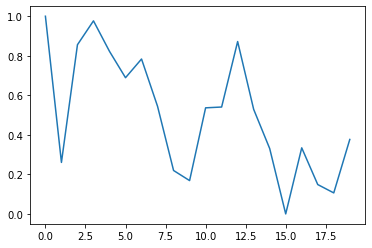

In [129]:
plt.plot(Df_result.loc[530,:][:-2].values)